In [16]:
import requests
import json
from bs4 import BeautifulSoup
import lxml
import pandas as pd
from highlight_text import fig_text
from mplsoccer import VerticalPitch,Pitch
import matplotlib.pyplot as plt
pd.set_option('mode.chained_assignment', None)
import seaborn as sns
from adjustText import adjust_text
from urllib.request import urlopen
import matplotlib.pyplot as plt
from PIL import Image
from mplsoccer import Pitch, add_image
plt.style.use('default')
import matplotlib.font_manager as fm
import os

In [17]:
url = "https://understat.com/match/19368"
r = requests.get(url)
soup = BeautifulSoup(r.content, 'lxml')
scripts = soup.find_all('script')
strings = scripts[1].string
ind_start = strings.index("('")+2
ind_end = strings.index("')")
json_data = strings[ind_start:ind_end]
json_data = json_data.encode('utf8').decode('unicode_escape')
json_data = json.loads(json_data)

title = soup.find_all('a')
title = title[5].text

In [18]:
Leagues = {'Ligue 1':"Ligue 1 uber eats",
        'EPL':"Premier League",
        'Serie A':"Serie A TIM",
        'La liga':"LaLiga Santander",
        'Bundesliga':"Bundesliga"}

Leagues_logos = {'Ligue 1':r"C:\Users\Administrator\Desktop\DataVizMaterial\Leagues logos\Logo_Ligue_1_Uber_Eats_2020.svg.png",
        'EPL':r"C:\Users\Administrator\Desktop\DataVizMaterial\Leagues logos\Premier-League-PNG-Image.png",
        'Serie A':r"C:\Users\Administrator\Desktop\DataVizMaterial\Leagues logos\se1113l151-serie-a-logo-lega-serie-a-european-leagues.png",
        'La liga':r"C:\Users\Administrator\Desktop\DataVizMaterial\Leagues logos\6893566_preview.png",
        'Bundesliga':r"C:\Users\Administrator\Desktop\DataVizMaterial\Leagues logos\bundesliga-home-events.png"}

if title in Leagues_logos.keys():
        league = Leagues[title]
        league_logo = Leagues_logos[title]
        print(league,": ",league_logo)

Bundesliga :  C:\Users\Administrator\Desktop\DataVizMaterial\Leagues logos\bundesliga-home-events.png


In [19]:
h_minutes = [json_data['h'][i]['minute'] for i in range(len(json_data['h']))]
h_X = [json_data['h'][i]['X'] for i in range(len(json_data['h']))]
h_Y = [json_data['h'][i]['Y'] for i in range(len(json_data['h']))]
h_xG = [json_data['h'][i]['xG'] for i in range(len(json_data['h']))]
h_player_name = [json_data['h'][i]['player'] for i in range(len(json_data['h']))]
h_assisted_by = [json_data['h'][i]['player_assisted'] for i in range(len(json_data['h']))]
h_player_id = [json_data['h'][i]['player_id'] for i in range(len(json_data['h']))]
h_player_team = [json_data['h'][i]['h_team'] for i in range(len(json_data['h']))]
h_situation = [json_data['h'][i]['situation'] for i in range(len(json_data['h']))]
h_result = [json_data['h'][i]['result'] for i in range(len(json_data['h']))]
h_last_action = [json_data['h'][i]['lastAction'] for i in range(len(json_data['h']))]


df_home = pd.DataFrame({'minute':h_minutes,'X':h_X,'Y':h_Y,'xG':h_xG,'player':h_player_name,'player_id':h_player_id,'Assist':h_assisted_by,'player_team':h_player_team,'situation':h_situation,"last action":h_last_action,'Output':h_result})

df_home['minute'] = df_home['minute'].astype(int)
df_home['X'] = df_home['X'].astype(float).round(2)
df_home['Y'] = df_home['Y'].astype(float).round(2)
df_home['xG'] = df_home['xG'].astype(float).round(2)
df_home['minute'] = df_home['minute'].astype(int)

df_home.Output.replace(['MissedShots','SavedShot', 'BlockedShot','ShotOnPost'],
                      ['Missed Shot','Saved Shot', 'Blocked Shot', 'Shot On Post'],inplace=True)
df_home['situation'].replace(['OpenPlay','DirectFreekick','FromCorner','SetPiece'],
                            ['Open Play','Direct Free kick','From Corner','Set Piece'] ,inplace=True)

df_home['last action'].replace(['BallRecovery', 'TakeOn','Throughball','LayOff', 'HeadPass','BallTouch','BlockedPass'],
                               ['Ball Recovery', 'Take On','Through ball','Lay Off', 'Head Pass','Ball Touch','Blocked Pass'],inplace=True)

for i in range(len(df_home)):
    df_home['X'][i] = df_home['X'][i]*120 - 0.3
    df_home['Y'][i] = df_home['Y'][i]*80

home_team = df_home['player_team'].unique()[0]
home_score = df_home[df_home['Output'] == 'Goal'].shape[0]
home_score_xg = df_home['xG'].sum()
home_score_xg = round(home_score_xg,2)

df_home

,minute,X,Y,xG,player,player_id,Assist,player_team,situation,last action,Output
0,6,107.7,46.4,0.08,Simon Zoller,139,Kevin Stöger,Bochum,Open Play,Chipped,Blocked Shot
1,22,107.7,32.0,0.31,Anthony Losilla,9705,Philipp Hofmann,Bochum,Open Play,Head Pass,Missed Shot
2,30,108.9,40.8,0.06,Philipp Hofmann,10736,Takuma Asano,Bochum,Open Play,Aerial,Saved Shot
3,34,87.3,39.2,0.01,Philipp Förster,9076,Kevin Stöger,Bochum,Open Play,Pass,Saved Shot
4,37,93.3,32.0,0.03,Takuma Asano,6087,Philipp Hofmann,Bochum,Open Play,Pass,Saved Shot
5,46,101.7,14.4,0.01,Cristian Gamboa,855,None,Bochum,Open Play,None,Missed Shot
6,60,105.3,32.8,0.03,Anthony Losilla,9705,Philipp Förster,Bochum,From Corner,Cross,Saved Shot
7,68,22.5,32.0,0.00,Cristian Gamboa,855,None,Bochum,Open Play,None,OwnGoal
8,70,102.9,54.4,0.04,Gerrit Holtmann,5270,Kevin Stöger,Bochum,From Corner,Pass,Saved Shot
9,71,96.9,25.6,0.02,Kevin Stöger,7058,Cristian Gamboa,Bochum,Open Play,Take On,Missed Shot


In [20]:
a_minutes = [json_data['a'][i]['minute'] for i in range(len(json_data['a']))]
a_X = [json_data['a'][i]['X'] for i in range(len(json_data['a']))]
a_Y = [json_data['a'][i]['Y'] for i in range(len(json_data['a']))]
a_xG = [json_data['a'][i]['xG'] for i in range(len(json_data['a']))]
a_player_name = [json_data['a'][i]['player'] for i in range(len(json_data['a']))]
a_assisted_by = [json_data['a'][i]['player_assisted'] for i in range(len(json_data['a']))]
a_player_id = [json_data['a'][i]['player_id'] for i in range(len(json_data['a']))]
a_player_team = [json_data['a'][i]['a_team'] for i in range(len(json_data['a']))]
a_situation = [json_data['a'][i]['situation'] for i in range(len(json_data['a']))]
a_result = [json_data['a'][i]['result'] for i in range(len(json_data['a']))]
a_last_action = [json_data['a'][i]['lastAction'] for i in range(len(json_data['a']))]

df_away = pd.DataFrame({'minute':a_minutes,'X':a_X,'Y':a_Y,'xG':a_xG,'player':a_player_name,'Assist':a_assisted_by,'player_id':a_player_id,'player_team':a_player_team,'situation':a_situation,'last action':a_last_action,'Output':a_result})

df_away['minute'] = df_away['minute'].astype(int)
df_away['X'] = df_away['X'].astype(float).round(2)
df_away['Y'] = df_away['Y'].astype(float).round(2)
df_away['xG'] = df_away['xG'].astype(float).round(2)
df_away['minute'] = df_away['minute'].astype(int)

for i in range(len(df_away)):
    df_away['X'][i] = df_away['X'][i]*120 - 0.3
    df_away['Y'][i] = df_away['Y'][i]*80


df_away.Output.replace(['MissedShots','SavedShot', 'BlockedShot','ShotOnPost'],
                      ['Missed Shot','Saved Shot', 'Blocked Shot', 'Shot On Post'],inplace=True)
df_away['situation'].replace(['OpenPlay','DirectFreekick','FromCorner','SetPiece'],
                            ['Open Play','Direct Free kick','From Corner','Set Piece'] ,inplace=True)

df_away['last action'].replace(['BallRecovery', 'TakeOn','Throughball','LayOff', 'HeadPass','BallTouch','BlockedPass'],
                               ['Ball Recovery', 'Take On','Through ball','Lay Off', 'Head Pass','Ball Touch','Blocked Pass'],inplace=True)

"""""df['Shot type'].replace(['LeftFoot', 'RightFoot','OtherBodyPart'],
                            ['Left Foot','Right Foot' ,'Other Body Part'] ,inplace=True)"""""


away_team = df_away['player_team'].unique()[0]
away_score = df_away[df_away['Output'] == 'Goal'].shape[0]
away_score_xg = df_away['xG'].sum()
away_score_xg = round(away_score_xg,2)
away_score_xg 

df_away

,minute,X,Y,xG,player,Assist,player_id,player_team,situation,last action,Output
0,3,101.7,28.0,0.05,Leroy Sané,Kingsley Coman,337,Bayern Munich,Open Play,Pass,Goal
1,9,88.5,41.6,0.02,Leroy Sané,Kingsley Coman,337,Bayern Munich,Open Play,Pass,Saved Shot
2,10,105.3,32.8,0.10,Benjamin Pavard,Thomas Müller,3363,Bayern Munich,Open Play,Head Pass,Missed Shot
3,15,93.3,32.8,0.05,Thomas Müller,Leroy Sané,224,Bayern Munich,Open Play,Take On,Blocked Shot
4,16,87.3,18.4,0.02,Benjamin Pavard,Joshua Kimmich,3363,Bayern Munich,Open Play,Pass,Blocked Shot
5,17,102.9,24.8,0.02,Kingsley Coman,None,226,Bayern Munich,From Corner,Aerial,Missed Shot
6,19,110.1,53.6,0.09,Leroy Sané,Thomas Müller,337,Bayern Munich,Open Play,Head Pass,Missed Shot
7,24,114.9,33.6,0.30,Matthijs de Ligt,Joshua Kimmich,7902,Bayern Munich,From Corner,Cross,Goal
8,28,90.9,56.0,0.02,Sadio Mané,Leroy Sané,838,Bayern Munich,Open Play,Pass,Saved Shot
9,32,113.7,38.4,0.63,Thomas Müller,None,224,Bayern Munich,Open Play,None,Saved Shot


In [21]:
for root,dirs,files in os.walk(r"C:\Users\Administrator\Desktop\DataVizMaterial\club badges"):
    for file in files:
        try:
            if file.startswith(f'{home_team}'):
                print(os.path.join(root,file))
                HomeTeamLogo_ = os.path.join(root,file)
                
            if file.startswith(f'{away_team}'):
                print(os.path.join(root,file))
                AwayTeamLogo_ = os.path.join(root,file)
            
        except:
                print('Photo not found')
                break   

C:\Users\Administrator\Desktop\DataVizMaterial\club badges\Bayern Munich.png
C:\Users\Administrator\Desktop\DataVizMaterial\club badges\Bochum.png


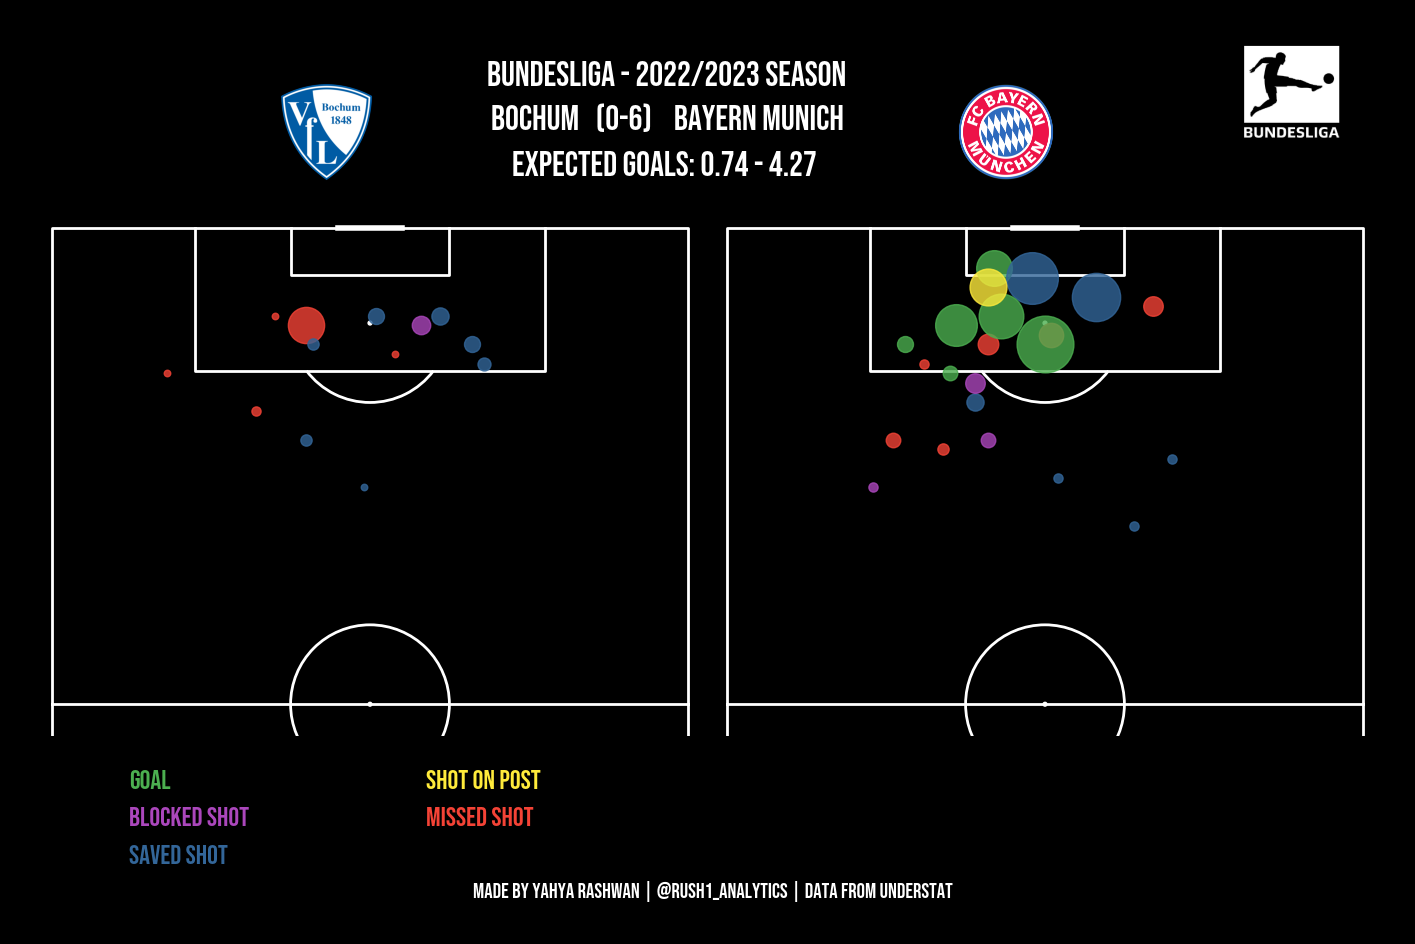

In [22]:
import matplotlib.pyplot as mpl

background = 'black'
text_color = 'white'

plt.style.use('dark_background')

mpl.rcParams['xtick.color']=text_color
mpl.rcParams['ytick.color']=text_color
mpl.rcParams['axes.labelcolor']='black'
mpl.rcParams['text.color']=text_color
mpl.rcParams['legend.fontsize'] = 15

path = r"D:\Downloads\Downloads\1d8761b0-9410-11e9-ba67-ebab80fd2244.otf"
fontprop = fm.FontProperties(fname=path, size=60, weight='bold', style='normal', stretch='normal')
fontprop2 = fm.FontProperties(fname=path, size=12.5*2, weight='bold', style='normal', stretch='normal')
fontprop3 = fm.FontProperties(fname=path, size=6.5*3, weight='bold', style='normal', stretch='normal')

pitch = VerticalPitch( half=True,goal_type='line',line_color='white')
fig, ax = plt.subplots(figsize=(6*3,4*3))
ax.axis('off')

HomeShots = fig.add_axes((0.10, 0.275, 0.45, 0.45))
HomeShots.patch.set_facecolor('black')
HomeShots.axis('off')
pitch.draw(ax=HomeShots)

for i in range(len(df_home)):
        if df_home.Output[i] == 'Goal':
            pitch.scatter(ax=HomeShots,x=df_home['X'][i],y=df_home['Y'][i],c="#4CAF50",s=df_home['xG'][i]*2200,alpha=0.8,marker='o',edgecolors='#4CAF50')
        elif df_home.Output[i] == 'Blocked Shot':
            pitch.scatter(ax=HomeShots,x=df_home['X'][i],y=df_home['Y'][i],c="#AB47BC",s=df_home['xG'][i]*2200,alpha=0.8,marker='o',edgecolors='#AB47BC')
        elif df_home.Output[i] == 'Saved Shot':
            pitch.scatter(ax=HomeShots,x=df_home['X'][i],y=df_home['Y'][i],c="#336699",s=df_home['xG'][i]*2200,alpha=0.8,marker='o',edgecolors='#336699')
        elif df_home.Output[i] == 'Shot On Post':
            pitch.scatter(ax=HomeShots,x=df_home['X'][i],y=df_home['Y'][i],c="#FFEB3B",s=df_home['xG'][i]*2200,alpha=0.8,marker='o',edgecolors='#FFEB3B')
        else:
            pitch.scatter(ax=HomeShots,x=df_home['X'][i],y=df_home['Y'][i],c="#F44336",s=df_home['xG'][i]*2200,alpha=0.8,marker='o',edgecolors='#F44336')

AwayShots = fig.add_axes((0.475, 0.275, 0.45, 0.45))
AwayShots.patch.set_facecolor(background)
pitch.draw(ax=AwayShots)
AwayShots.axis('off')

for i in range(len(df_away)):
        if df_away.Output[i] == 'Goal':
            pitch.scatter(ax=AwayShots,x=df_away['X'][i],y=df_away['Y'][i],c="#4CAF50",s=df_away['xG'][i]*2200,alpha=0.8,marker='o',edgecolors='#4CAF50')   
        elif df_away.Output[i] == 'Blocked Shot':
            pitch.scatter(ax=AwayShots,x=df_away['X'][i],y=df_away['Y'][i],c="#AB47BC",s=df_away['xG'][i]*2200,alpha=0.8,marker='o',edgecolors='#AB47BC')
        elif df_away.Output[i] == 'Saved Shot':
            pitch.scatter(ax=AwayShots,x=df_away['X'][i],y=df_away['Y'][i],c="#336699",s=df_away['xG'][i]*2200,alpha=0.8,marker='o',edgecolors='#336699')
        elif df_away.Output[i] == 'Shot On Post':
            pitch.scatter(ax=AwayShots,x=df_away['X'][i],y=df_away['Y'][i],c="#FFEB3B",s=df_away['xG'][i]*2200,alpha=0.8,marker='o',edgecolors='#FFEB3B')
        else:
            pitch.scatter(ax=AwayShots,x=df_away['X'][i],y=df_away['Y'][i],c="#F44336",s=df_away['xG'][i]*2200,alpha=0.8,marker='o',edgecolors='#F44336')


HomeLogo = fig.add_axes((0.26, 0.7375,0.125*0.65,0.125*0.65))
HomeLogo.patch.set_facecolor(background)
HomeLogo.axis('off')
im = plt.imread(HomeTeamLogo_)
HomeLogo.imshow(im)

AwayLogo = fig.add_axes((0.6375, 0.7375,0.125*0.65,0.125*0.65))
AwayLogo.patch.set_facecolor(background)
AwayLogo.axis('off')
im = plt.imread(AwayTeamLogo_)
AwayLogo.imshow(im)

LeagueLogo = fig.add_axes((0.775, 0.75,0.125,0.125))
LeagueLogo.patch.set_facecolor(background)
LeagueLogo.axis('off')
im = plt.imread(league_logo)
LeagueLogo.imshow(im)

MatchInfo = fig.add_axes((0.365, 0.7275,0.125*2,0.125))
MatchInfo.patch.set_facecolor(background)
MatchInfo.axis('off')
MatchInfo.text(0.5, 0.8, f'{league} - 2022/2023 Season',ha='center', va='center', color=text_color,fontproperties=fontprop2)
MatchInfo.text(0.5, 0.5, f'{home_team}   ({home_score}-{away_score})    {away_team}',ha='center', va='center', color=text_color,fontproperties=fontprop2)
MatchInfo.text(0.5, 0.2, f'Expected Goals: {home_score_xg} - {away_score_xg} ',ha='center', va='center', color=text_color,fontproperties=fontprop2)

ax_opta10 = fig.add_axes((0.5125, 0.1875,0.125*3,0.125/2))
ax_opta10.patch.set_facecolor(background)
ax_opta10.axis('off')

"""ax_opta10.scatter(0.78,0.5,c="#4CAF50",s=1*2200,alpha=0.8,marker='h',edgecolors='#4CAF50')
ax_opta10.scatter(0.77,0.5,c="#4CAF50",s=0.75*2200,alpha=0.8,marker='h',edgecolors='#4CAF50')
ax_opta10.scatter(0.76,0.5,c="#4CAF50",s=0.5*2200,alpha=0.8,marker='h',edgecolors='#4CAF50')
ax_opta10.scatter(0.75,0.5,c="#4CAF50",s=0.25*2200,alpha=0.8,marker='h',edgecolors='#4CAF50')"""

MatchLegend = fig.add_axes((0.15 , 0.1875- 0.125/2,0.125*2.75,0.125))
MatchLegend.patch.set_facecolor(background)
MatchLegend.axis('off')

MatchLegend.text(0.12,0.85, 'Goal', fontproperties= fontprop3, color='#4CAF50')
MatchLegend.text(0.12,0.6, 'Blocked Shot', fontproperties= fontprop3, color="#AB47BC")
MatchLegend.text(0.12,0.35, 'Saved Shot', fontproperties= fontprop3, color="#336699")
MatchLegend.text(0.12*5,0.85, 'Shot On Post', fontproperties= fontprop3, color='#FFEB3B')
MatchLegend.text(0.12*5,0.6, 'Missed Shot', fontproperties= fontprop3, color='#F44336')
MatchLegend.text(0.675, 0.1205, 'Made by Yahya Rashwan | @Rush1_Analytics | Data from understat', fontsize = 15,fontproperties=fontprop3)

plt.savefig(rf"C:\Users\Administrator\Desktop\trials\{home_team} vs {away_team} - {league}.png",dpi=300,bbox_inches='tight',facecolor="#393b3d")

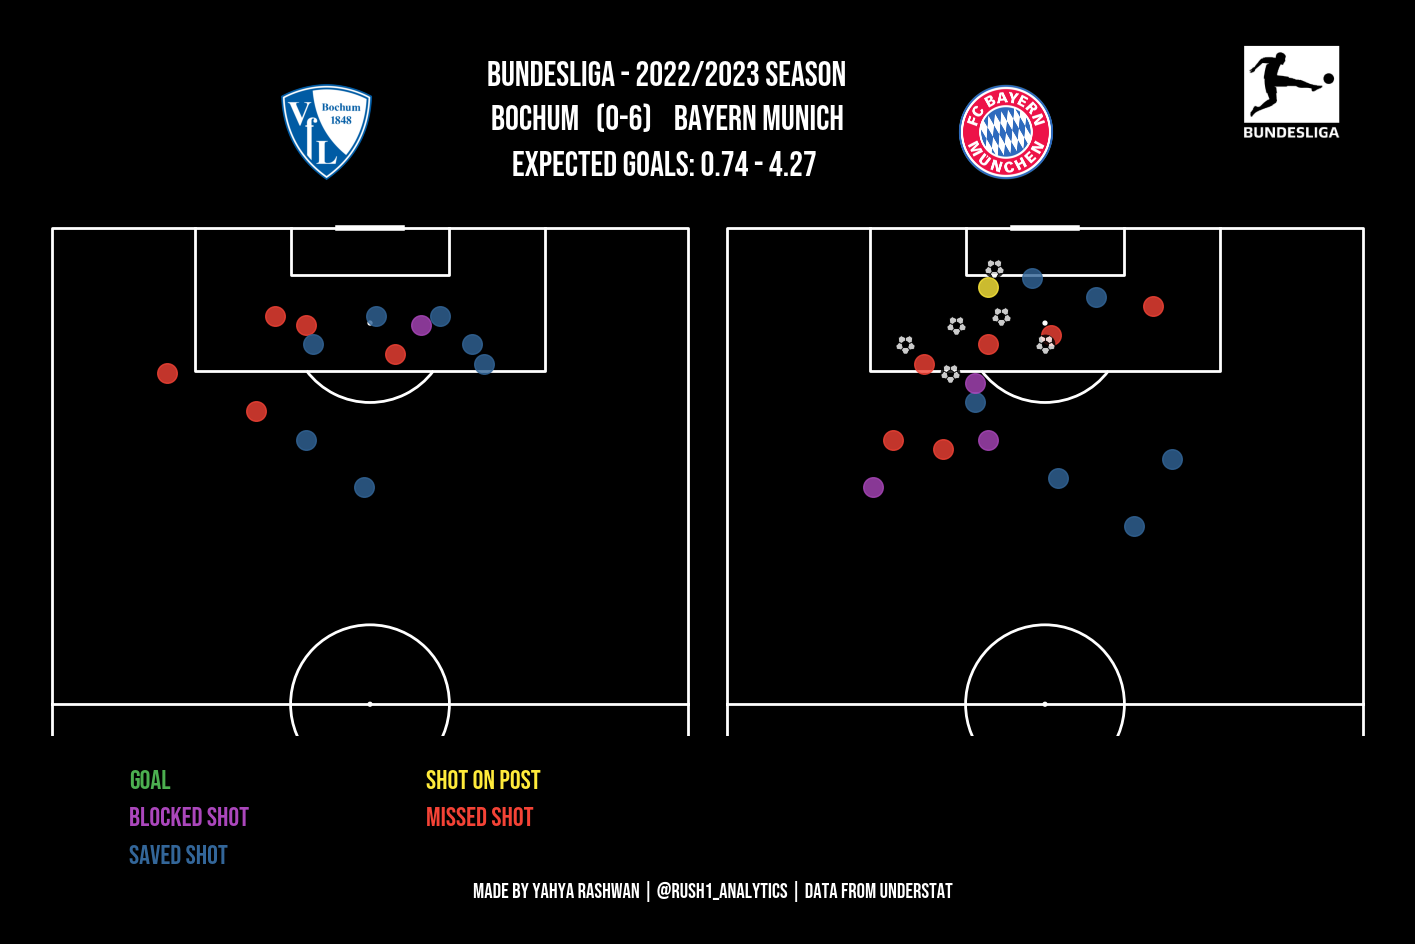

In [24]:
background = 'black'
text_color = 'white'

plt.style.use('dark_background')

mpl.rcParams['xtick.color']=text_color
mpl.rcParams['ytick.color']=text_color
mpl.rcParams['axes.labelcolor']='black'
mpl.rcParams['text.color']=text_color
mpl.rcParams['legend.fontsize'] = 15

path = r"D:\Downloads\Downloads\1d8761b0-9410-11e9-ba67-ebab80fd2244.otf"
fontprop = fm.FontProperties(fname=path, size=60, weight='bold', style='normal', stretch='normal')
fontprop2 = fm.FontProperties(fname=path, size=12.5*2, weight='bold', style='normal', stretch='normal')
fontprop3 = fm.FontProperties(fname=path, size=6.5*3, weight='bold', style='normal', stretch='normal')

pitch = VerticalPitch( half=True,goal_type='line',line_color='white')
fig, ax = plt.subplots(figsize=(6*3,4*3))
ax.axis('off')

HomeShots = fig.add_axes((0.10, 0.275, 0.45, 0.45))
HomeShots.patch.set_facecolor('black')
HomeShots.axis('off')
pitch.draw(ax=HomeShots)

for i in range(len(df_home)):
        if df_home.Output[i] == 'Goal':
            pitch.scatter(ax=HomeShots,x=df_home['X'][i],y=df_home['Y'][i],c="#4CAF50",s=200,alpha=0.8,marker='o',edgecolors='#4CAF50')
        elif df_home.Output[i] == 'Blocked Shot':
            pitch.scatter(ax=HomeShots,x=df_home['X'][i],y=df_home['Y'][i],c="#AB47BC",s=200,alpha=0.8,marker='o',edgecolors='#AB47BC')
        elif df_home.Output[i] == 'Saved Shot':
            pitch.scatter(ax=HomeShots,x=df_home['X'][i],y=df_home['Y'][i],c="#336699",s=200,alpha=0.8,marker='o',edgecolors='#336699')
        elif df_home.Output[i] == 'Shot On Post':
            pitch.scatter(ax=HomeShots,x=df_home['X'][i],y=df_home['Y'][i],c="#FFEB3B",s=200,alpha=0.8,marker='o',edgecolors='#FFEB3B')
        else:
            pitch.scatter(ax=HomeShots,x=df_home['X'][i],y=df_home['Y'][i],c="#F44336",s=200,alpha=0.8,marker='o',edgecolors='#F44336')

AwayShots = fig.add_axes((0.475, 0.275, 0.45, 0.45))
AwayShots.patch.set_facecolor(background)
pitch.draw(ax=AwayShots)
AwayShots.axis('off')

for i in range(len(df_away)):
        if df_away.Output[i] == 'Goal':
            pitch.scatter(ax=AwayShots,x=df_away['X'][i],y=df_away['Y'][i],c="white",s=200,alpha=0.8,marker='football',edgecolors='black')   
        elif df_away.Output[i] == 'Blocked Shot':
            pitch.scatter(ax=AwayShots,x=df_away['X'][i],y=df_away['Y'][i],c="#AB47BC",s=200,alpha=0.8,marker='o',edgecolors='#AB47BC')
        elif df_away.Output[i] == 'Saved Shot':
            pitch.scatter(ax=AwayShots,x=df_away['X'][i],y=df_away['Y'][i],c="#336699",s=200,alpha=0.8,marker='o',edgecolors='#336699')
        elif df_away.Output[i] == 'Shot On Post':
            pitch.scatter(ax=AwayShots,x=df_away['X'][i],y=df_away['Y'][i],c="#FFEB3B",s=200,alpha=0.8,marker='o',edgecolors='#FFEB3B')
        else:
            pitch.scatter(ax=AwayShots,x=df_away['X'][i],y=df_away['Y'][i],c="#F44336",s=200,alpha=0.8,marker='o',edgecolors='#F44336')


HomeLogo = fig.add_axes((0.26, 0.7375,0.125*0.65,0.125*0.65))
HomeLogo.patch.set_facecolor(background)
HomeLogo.axis('off')
im = plt.imread(HomeTeamLogo_)
HomeLogo.imshow(im)

AwayLogo = fig.add_axes((0.6375, 0.7375,0.125*0.65,0.125*0.65))
AwayLogo.patch.set_facecolor(background)
AwayLogo.axis('off')
im = plt.imread(AwayTeamLogo_)
AwayLogo.imshow(im)

LeagueLogo = fig.add_axes((0.775, 0.75,0.125,0.125))
LeagueLogo.patch.set_facecolor(background)
LeagueLogo.axis('off')
im = plt.imread(league_logo)
LeagueLogo.imshow(im)

MatchInfo = fig.add_axes((0.365, 0.7275,0.125*2,0.125))
MatchInfo.patch.set_facecolor(background)
MatchInfo.axis('off')
MatchInfo.text(0.5, 0.8, f'{league} - 2022/2023 Season',ha='center', va='center', color=text_color,fontproperties=fontprop2)
MatchInfo.text(0.5, 0.5, f'{home_team}   ({home_score}-{away_score})    {away_team}',ha='center', va='center', color=text_color,fontproperties=fontprop2)
MatchInfo.text(0.5, 0.2, f'Expected Goals: {home_score_xg} - {away_score_xg} ',ha='center', va='center', color=text_color,fontproperties=fontprop2)

MatchLegend = fig.add_axes((0.15 , 0.1875- 0.125/2,0.125*2.75,0.125))
MatchLegend.patch.set_facecolor(background)
MatchLegend.axis('off')

MatchLegend.text(0.12,0.85, 'Goal', fontproperties= fontprop3, color='#4CAF50')
MatchLegend.text(0.12,0.6, 'Blocked Shot', fontproperties= fontprop3, color="#AB47BC")
MatchLegend.text(0.12,0.35, 'Saved Shot', fontproperties= fontprop3, color="#336699")
MatchLegend.text(0.12*5,0.85, 'Shot On Post', fontproperties= fontprop3, color='#FFEB3B')
MatchLegend.text(0.12*5,0.6, 'Missed Shot', fontproperties= fontprop3, color='#F44336')
MatchLegend.text(0.675, 0.1205, 'Made by Yahya Rashwan | @Rush1_Analytics | Data from understat', fontsize = 15,fontproperties=fontprop3)

plt.savefig(rf"C:\Users\Administrator\Desktop\trials\{home_team} vs {away_team} - {league} xG.png",dpi=300,bbox_inches='tight',facecolor="#393b3d")